<a href="https://colab.research.google.com/github/AbdullahAZaidi/Imagenet_NeuralNet/blob/master/Imagenet_Processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import os
import tensorflow as tf

In [3]:
def url_to_image(url):

	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)

	return image

In [4]:
  # !mkdir /content/train 
  # !mkdir /content/train/cat
  # !mkdir /content/test
  # !mkdir /content/test/cat

In [7]:
def load_dataFromImagenet (wnid, n_train, n_test, t_class):
  page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid={}".format(wnid))
  soup = BeautifulSoup(page.content, 'html.parser')
  str_soup = str(soup)
  split_urls = str_soup.split('\r\n') 

  !mkdir /content/training
  !mkdir /content/testing

  path_train = '/content/training/{}'.format(t_class)
  os.mkdir(path_train)
  path_test = '/content/testing/{}'.format(t_class)
  os.mkdir(path_test)

  for progress in range(n_train):              #store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        I = url_to_image(split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/training/{}/img{}.jpg'.format(t_class, progress)#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

  for progress_t in range(n_test):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress_t%20==0):
        print(progress_t)
    if not split_urls[progress_t] == None:
      try:
        I = url_to_image(split_urls[n_train+progress_t])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/testing/{}/img{}.jpg'.format(t_class, progress_t)#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None


In [8]:
load_dataFromImagenet('n02123159', 100, 50, 'cats')
load_dataFromImagenet('n02084071', 100, 50, 'dog')

0
20
40
60
80
0
20
40
mkdir: cannot create directory ‘/content/training’: File exists
mkdir: cannot create directory ‘/content/testing’: File exists
0
20
40
60
80
0
20
40


img11.jpg  img17.jpg  img28.jpg  img38.jpg  img43.jpg  img49.jpg
img13.jpg  img1.jpg   img29.jpg  img39.jpg  img44.jpg  img5.jpg
img14.jpg  img21.jpg  img2.jpg	 img3.jpg   img45.jpg  img8.jpg
img15.jpg  img26.jpg  img33.jpg  img40.jpg  img46.jpg  img9.jpg
img16.jpg  img27.jpg  img35.jpg  img41.jpg  img48.jpg


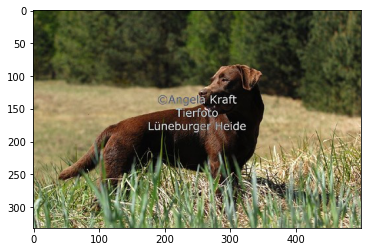

In [ ]:
!ls /content/testing/dog/
img = mimg.imread('/content/testing/dog/img11.jpg')
plt.imshow(img)

ls: cannot access '/content/train/dog/': No such file or directory


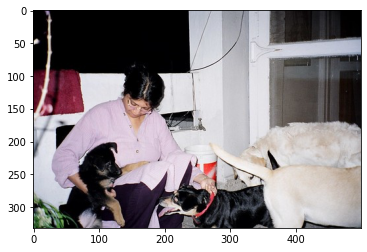

In [ ]:
! ls /content/train/dog/
img = mimg.imread('/content/training/dog/img10.jpg')
plt.imshow(img)

# Classification Model

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


Using TensorFlow backend.


In [ ]:
# Data Loader into the model for classification using ImageDataGenerator


trdata = ImageDataGenerator(zoom_range=[0.5,1])
traindata = trdata.flow_from_directory(directory="/content/training/",target_size=(224,224))
tsdata = ImageDataGenerator(zoom_range=[0.5,1])
testdata = tsdata.flow_from_directory(directory='/content/testing/', target_size=(224,224))
print(len(testdata[1]))

Found 142 images belonging to 2 classes.
Found 75 images belonging to 2 classes.
2


In [ ]:
# Convolutional Network Model based on VGG16

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10)

Epoch 1/10
100/100 [==============================] - 78s 779ms/step - loss: 4.7567 - accuracy: 0.5451 - val_loss: 0.6768 - val_accuracy: 0.6109
Epoch 2/10
100/100 [==============================] - 60s 601ms/step - loss: 0.7196 - accuracy: 0.5637 - val_loss: 0.6689 - val_accuracy: 0.6148
Epoch 3/10
100/100 [==============================] - 60s 597ms/step - loss: 1.2089 - accuracy: 0.5528 - val_loss: 0.6646 - val_accuracy: 0.6144
Epoch 4/10
100/100 [==============================] - 59s 594ms/step - loss: 0.6896 - accuracy: 0.5595 - val_loss: 0.6576 - val_accuracy: 0.6187
Epoch 5/10
100/100 [==============================] - 59s 590ms/step - loss: 0.6943 - accuracy: 0.5634 - val_loss: 0.6852 - val_accuracy: 0.6148
Epoch 6/10
100/100 [==============================] - 59s 588ms/step - loss: 0.7653 - accuracy: 0.5599 - val_loss: 0.6079 - val_accuracy: 0.6059
Epoch 7/10
100/100 [==============================] - 58s 580ms/step - loss: 0.6858 - accuracy: 0.5634 - val_loss: 0.6428 - val_ac

In [ ]:
model.save_weights("model_vggAb.h5") 
model.save("/content/modelAb")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim(top = 1)
plt.show()

NameError: ignored

[[0.5620046  0.43799537]]
cat


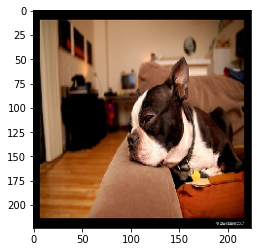

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/testing/dog/img9.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/modelAb")
output = saved_model.predict(img)
print (output)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

[[0.5620046  0.43799537]]
cat


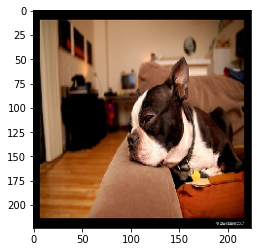

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/testing/dog/img9.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/modelAb")
output = model.predict(img)
print (output)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')